In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

Missing Value plots

1. Missing value Heatmap
2. Bar plot of missing values
3. Percentage
4. Missingno
5. Dendogram
6. KDE

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

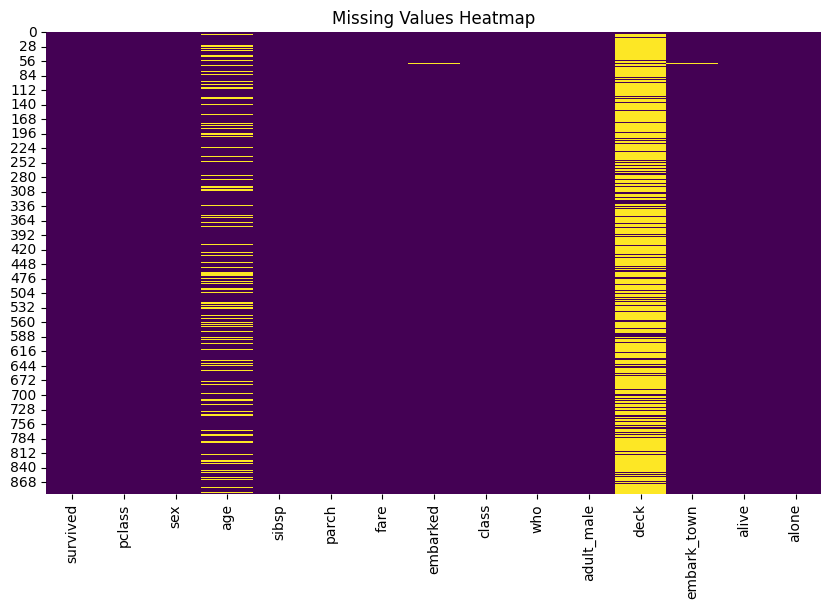

In [6]:
# Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

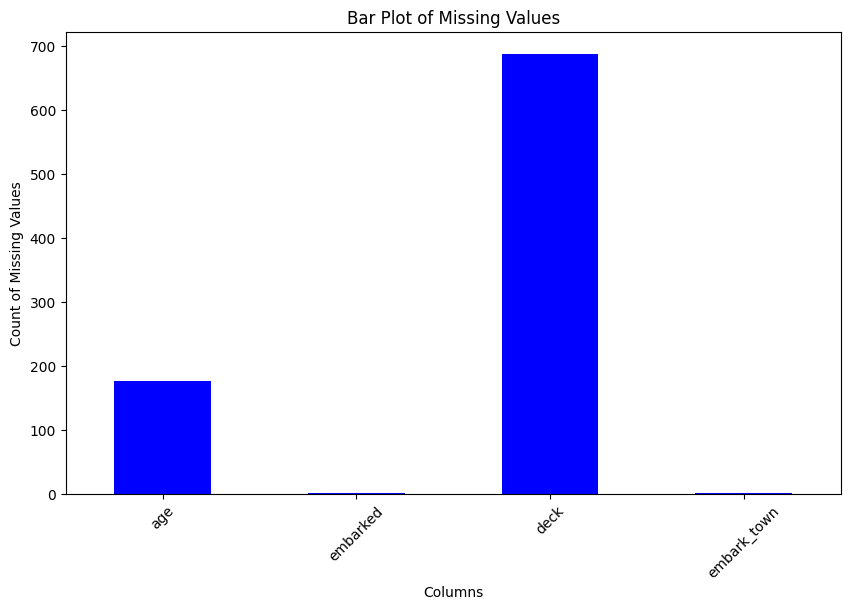

In [8]:
# Bar plot for missing

missing_values = titanic_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='blue')
plt.title("Bar Plot of Missing Values")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

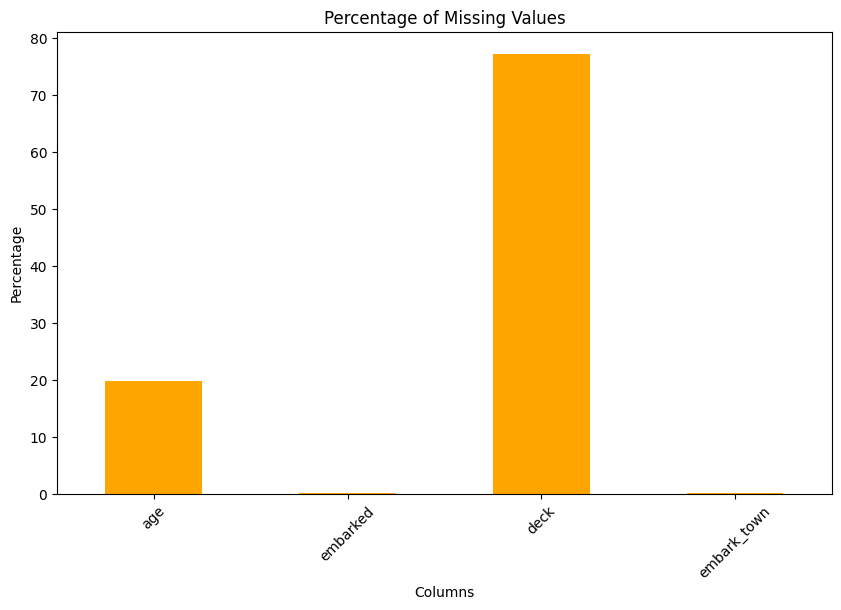

In [9]:
# Percentage missing value plots

missing_percentage = (titanic_df.isnull().sum() / len(titanic_df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Bar plot
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()


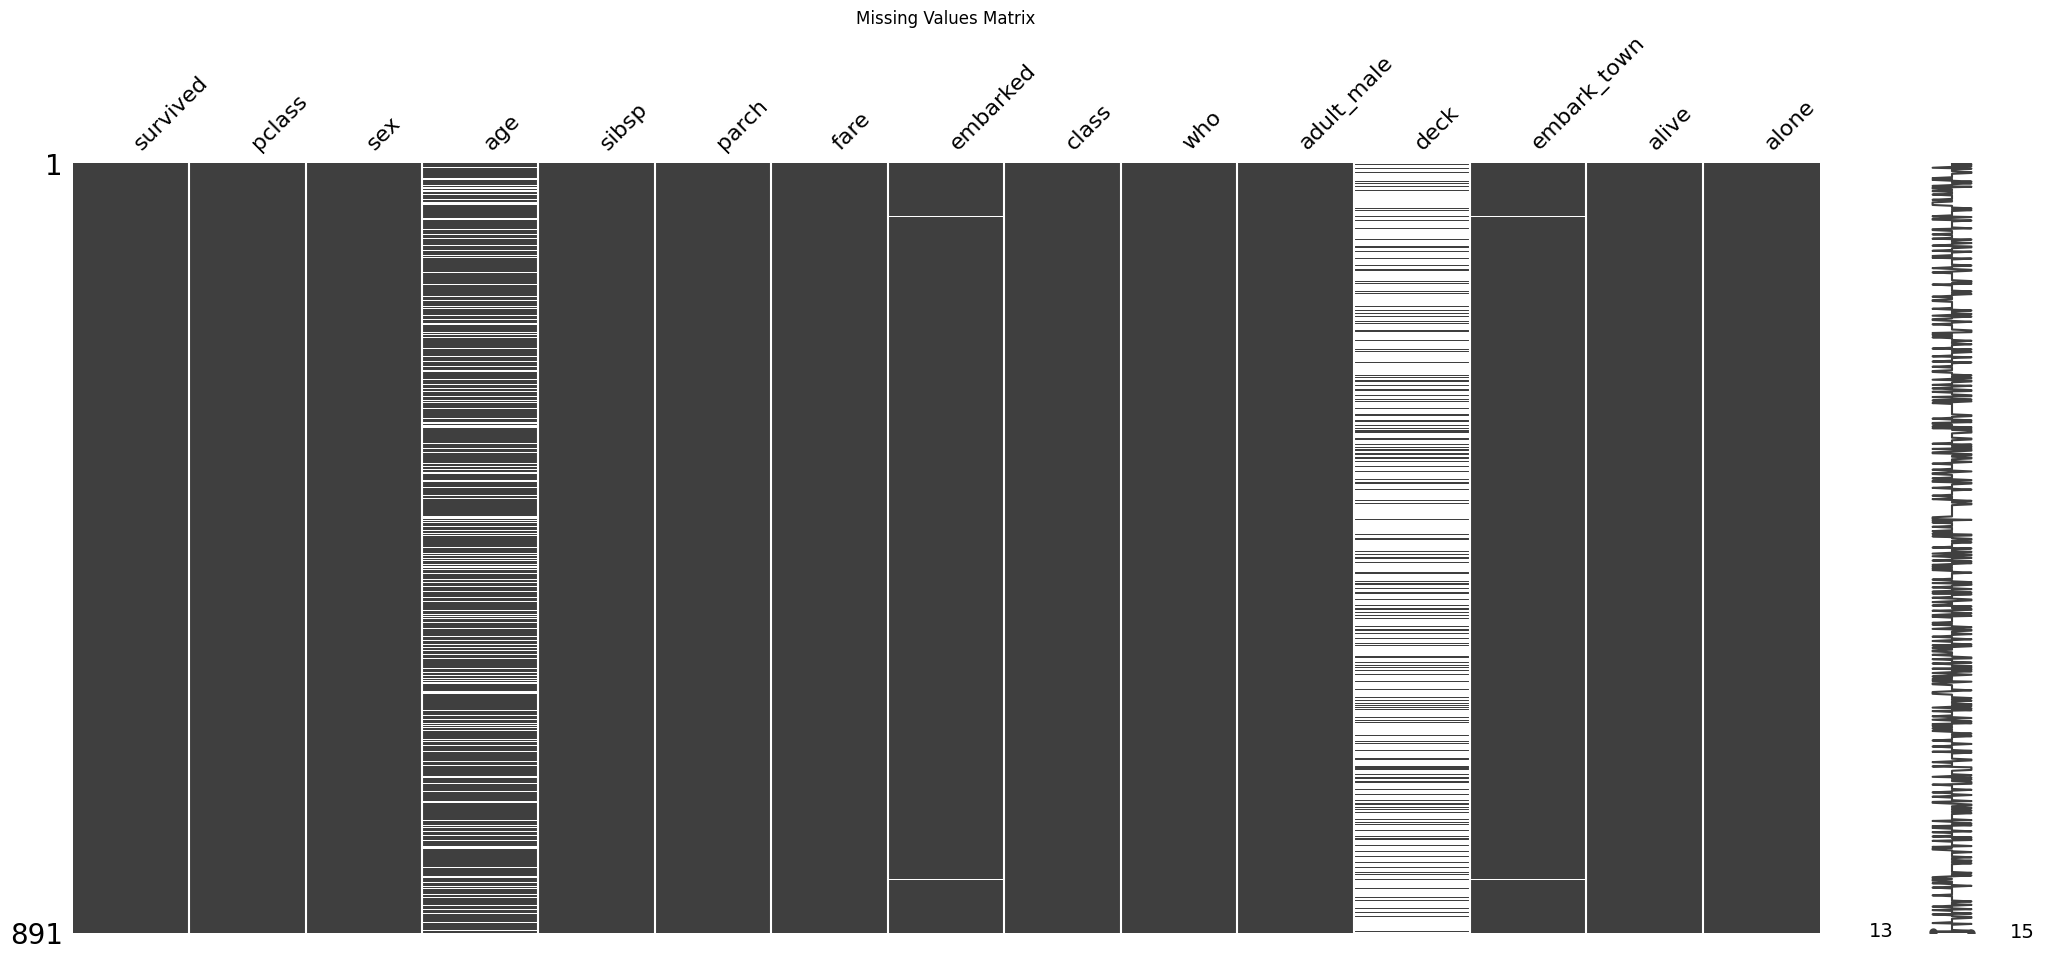

In [11]:
# missingno

import missingno as msno

# Missingness matrix
msno.matrix(titanic_df)
plt.title("Missing Values Matrix")
plt.show()

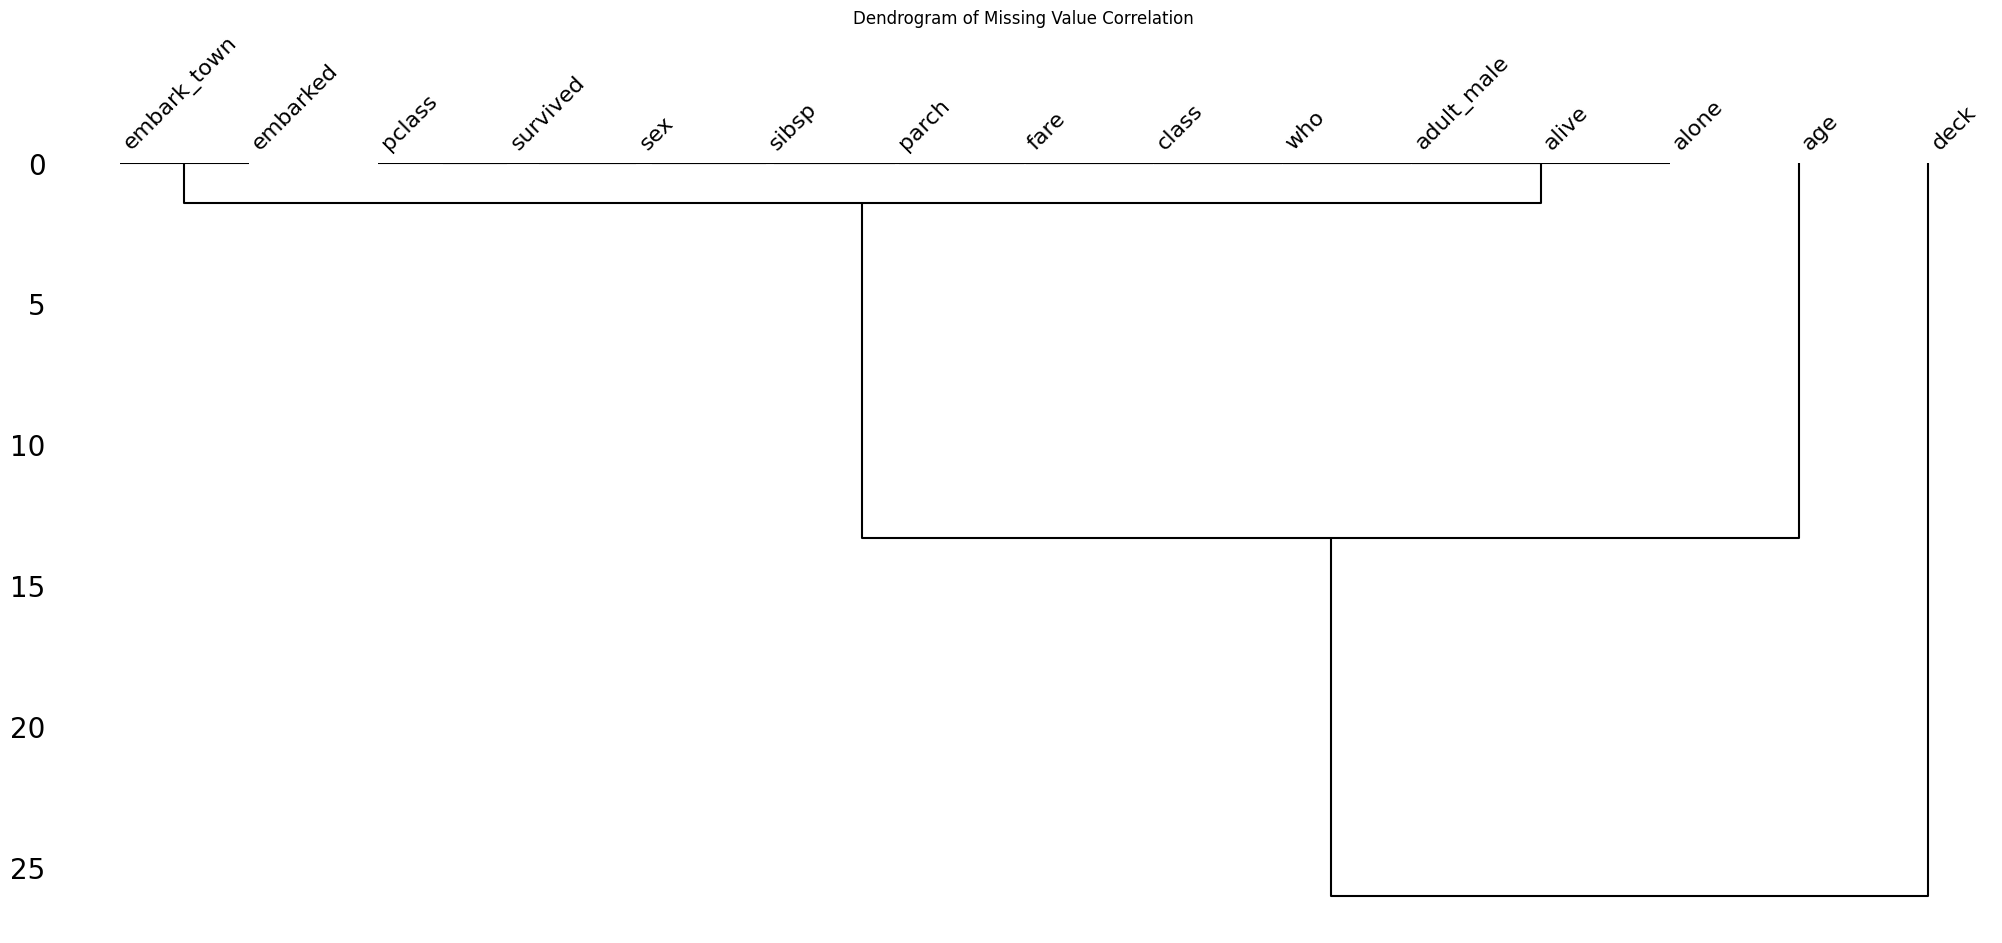

In [12]:
# Missingness dendrogram
msno.dendrogram(titanic_df)
plt.title("Dendrogram of Missing Value Correlation")
plt.show()


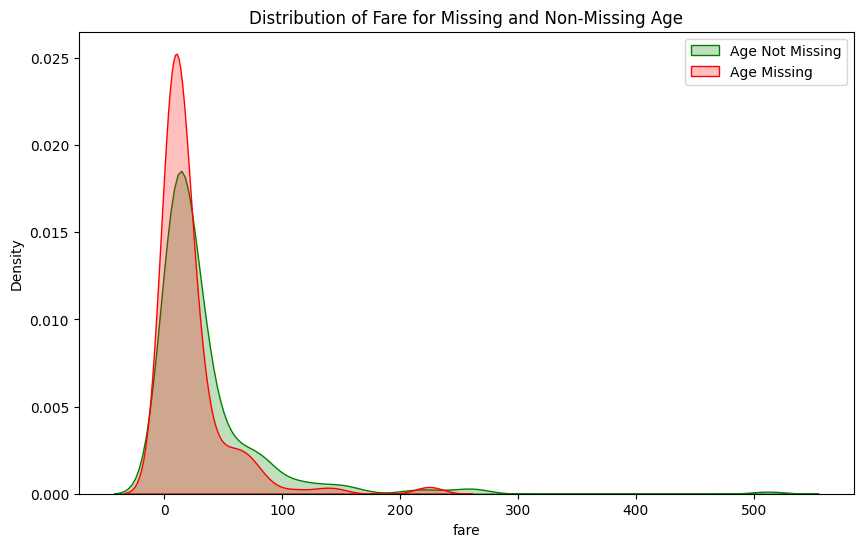

In [15]:
# KDE plot for missing vs non-missing in 'age'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_df[titanic_df['age'].notnull()], x='fare', label='Age Not Missing', fill=True, color='green')
sns.kdeplot(data=titanic_df[titanic_df['age'].isnull()], x='fare', label='Age Missing', fill=True, color='red')
plt.title("Distribution of Fare for Missing and Non-Missing Age")
plt.legend()
plt.show()


In [2]:
# Handle missing values
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())
titanic_df['embark_town'] = titanic_df['embark_town'].fillna('missing')

# Dynamically identify numerical and categorical columns
numerical_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = titanic_df.select_dtypes(include=['object', 'category']).columns.tolist()


In [10]:
# Remove the target variable from the feature columns
numerical_cols = [col for col in numerical_cols if col not in ['survived']]
categorical_cols = [col for col in categorical_cols if col not in ['survived', 'alive', 'alone']]

# Preprocess numerical data: Standard Scaling
scaler = StandardScaler()
titanic_df[numerical_cols] = scaler.fit_transform(titanic_df[numerical_cols])


In [11]:
# Preprocess categorical data: Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    titanic_df[col] = encoder.fit_transform(titanic_df[col])

# Define features (X) and target (y)
X = titanic_df.drop(['survived', 'alive', 'alone'], axis=1)
y = titanic_df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Confusion Matrix:
[[90 15]
 [18 56]]
